# Day 2 - Tutorial 📚
## Advanced ML Boot Camp
---

## ⚙ *Basic Initialization*
Please do not make any changes to this section.   
This section is required for the demo to work and not running it would result in errors 🚨.   
However, if you would like to understand the code, feel free to do so 😊

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd

import time as t

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# Init data ☎
telco = pd.read_csv('https://raw.githubusercontent.com/SPAI-Team/Advanced-ML-Workshop-2021/main/Datasets/Telco-Customer.csv')

# dropping only customerID as it will not affect the model in any way
telco = telco.drop(columns=['customerID', 'TotalCharges'])

In [ ]:
telco['Churn'] = pd.get_dummies(telco['Churn'], drop_first=True)

In [ ]:
# Data Cleaning
telco = telco.replace(to_replace='No internet service', value='No')
num_telco = telco[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn']]

cat_telco = pd.get_dummies(telco.drop(columns=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn']), drop_first=True)
telco = pd.merge(num_telco, cat_telco, left_index=True, right_index=True)

In [ ]:
# Defining features and target variables respectively
X, y = telco.drop(columns=['Churn']), telco['Churn']

---

## Demonstration 1️⃣
We will be attempting to itterate through the different models 5 times. What do you observe? 🤔

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)



scores = {
    'itteration': [],
    'accuracy': [],
    'f1': [],
    'fit_time': [],
}

for i in range(0, 5):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    scores['itteration'].append(i + 1)

    start = t.time()
    lr.fit(x_train, y_train)
    end = t.time() - start

    y_pred = lr.predict(x_test)

    scores['accuracy'].append(accuracy_score(y_test, y_pred))
    scores['f1'].append(f1_score(y_test, y_pred))
    scores['fit_time'].append(end)

> ### *Looking at the accuracy for each models throughout the different itterations. Are the accuracy scores the same?*

In [ ]:
pd.DataFrame(scores, index=scores['itteration'])

,itteration,accuracy,f1,fit_time
1,1,0.813343,0.609212,0.129734
2,2,0.797019,0.570571,0.098112
3,3,0.801987,0.587888,0.092049
4,4,0.814762,0.618978,0.085211
5,5,0.800568,0.610264,0.112993


### *Are the scores the same?*   

We can see for each model, the accuracy scores are all different. Other metrics like f1 score and training times are different too! 🤯   

---

## Demonstration 2️⃣
We will now be looking at how to apply the different cross validation techniques.

In [ ]:
# initialize our own scoring
scoring = ['f1', 'accuracy']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### To get scorers, run the following code:
```python   
from sklearn.metrics import SCORERS   
print(SCORERS.keys())   
```

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(LogisticRegression(max_iter=1000), x_train, y_train, cv=5, scoring=scoring)
pd.DataFrame(scores)

,fit_time,score_time,test_f1,test_accuracy
0,0.106621,0.003003,0.592058,0.799468
1,0.072802,0.003026,0.595978,0.803904
2,0.063115,0.002002,0.590099,0.816327
3,0.192920,0.003000,0.590654,0.805679
4,0.075001,0.003005,0.576208,0.797513


As you can see, cross validation does something similar as what we did above (looping through the model x times) 😎.   
At the same time, by using sklearn's built in cross validation library, we reduced the number of lines of code from 25 to just 1 line of code! 🙌

---

## Demonstration 3️⃣
We will be attempting to see models performance in different cases.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate

scores = cross_validate(RandomForestClassifier(), x_train, y_train, cv=5, scoring=scoring, return_train_score=True)

pd.DataFrame({
    'Training Accuracy': [np.mean(scores['train_accuracy'])],
    'Testing Accuracy': [np.mean(scores['test_accuracy'])],
    'Training F1_Score': [np.mean(scores['train_f1'])],
    'Testing F1_Score': [np.mean(scores['test_f1'])],
})

,Training Accuracy,Testing Accuracy,Training F1_Score,Testing F1_Score
0,0.998003,0.787716,0.996199,0.535027


> *Observe the test_accuracy and train_accuracy*   
Notice how the training accuracy is significantly higher compared to the testing accuracy? Why is that so?

In [ ]:
# from sklearn.naive_bayes import 
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import cross_validate

scores = cross_validate(DummyClassifier(strategy='uniform'), x_train, y_train, cv=5, scoring=scoring, return_train_score=True)

pd.DataFrame({
    'Training Accuracy': [np.mean(scores['train_accuracy'])],
    'Testing Accuracy': [np.mean(scores['test_accuracy'])],
    'Training F1_Score': [np.mean(scores['train_f1'])],
    'Testing F1_Score': [np.mean(scores['test_f1'])],
})

,Training Accuracy,Testing Accuracy,Training F1_Score,Testing F1_Score
0,0.496805,0.501601,0.345385,0.352453


> *Observe the test_accuracy and train accuracy*   
Now Observe that both the test and training accuracy scores are very low comapred to other models? Why is that so?

---

*Before viewing demonstration 4, 5 and 6, please run the two cells below*

In [ ]:
# Required to install yellowbrick
!pip install yellowbrick

In [ ]:
from yellowbrick.model_selection import LearningCurve
import matplotlib.pyplot as plt

## Demonstration 4️⃣
We will be attempting to plot a Learning Curve base off the two models in demonstration 3.   
This demonstration shows an example of a **good fit**

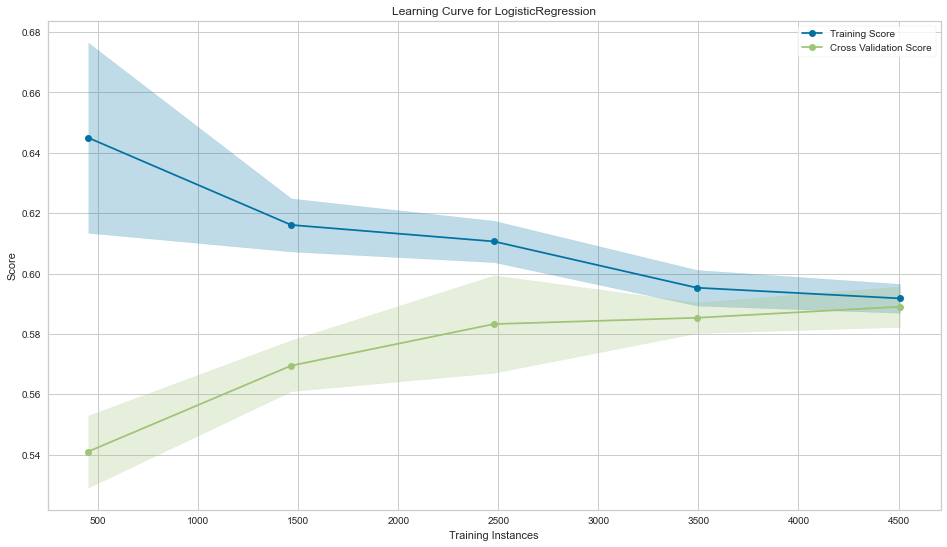

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from sklearn.linear_model import LogisticRegression

ax = plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 16})

viz = LearningCurve(LogisticRegression(max_iter=1000), cv=5, scoring='f1', n_jobs=-1)
viz.fit(x_train, y_train)

viz.show()

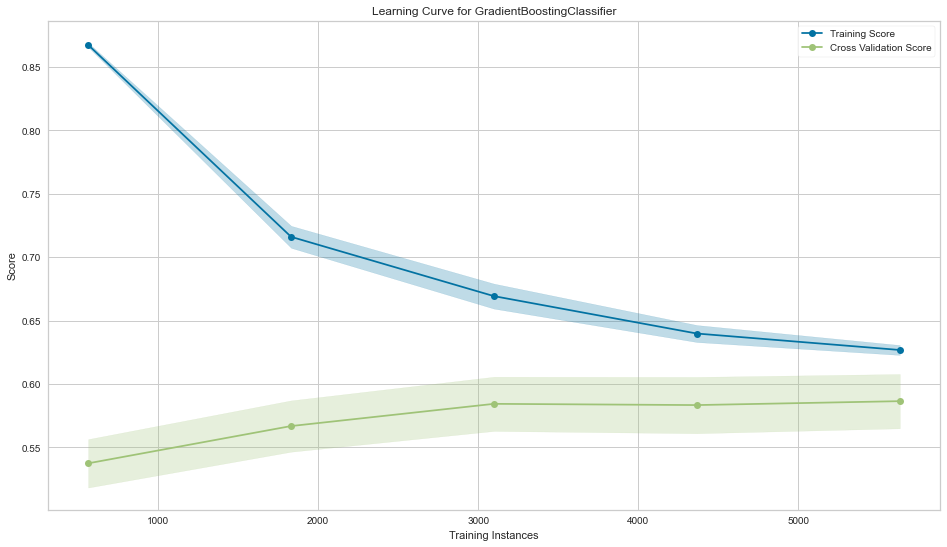

<AxesSubplot:title={'center':'Learning Curve for GradientBoostingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 16})

viz = LearningCurve(GradientBoostingClassifier(), cv=5, scoring='f1', n_jobs=-1)
viz.fit(x_train, y_train)
viz.show()

---

## Demonstration 5️⃣
We will be attempting to plot a Learning Curve base off the two models in demonstration 3.   
This demonstration shows an example of a **Overfit**

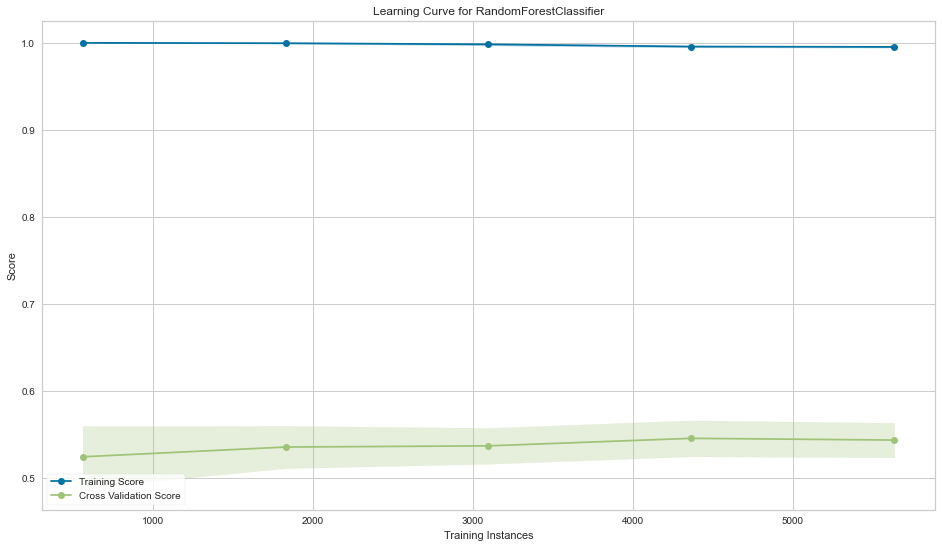

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 16})

viz = LearningCurve(RandomForestClassifier(), cv=5, scoring='f1', n_jobs=-1)
viz.fit(x_train, y_train)
viz.show()

---

## Demonstration 6️⃣
We will be attempting to plot a Learning Curve base off the two models in demonstration 3.   
This demonstration shows an example of a **Underfit**

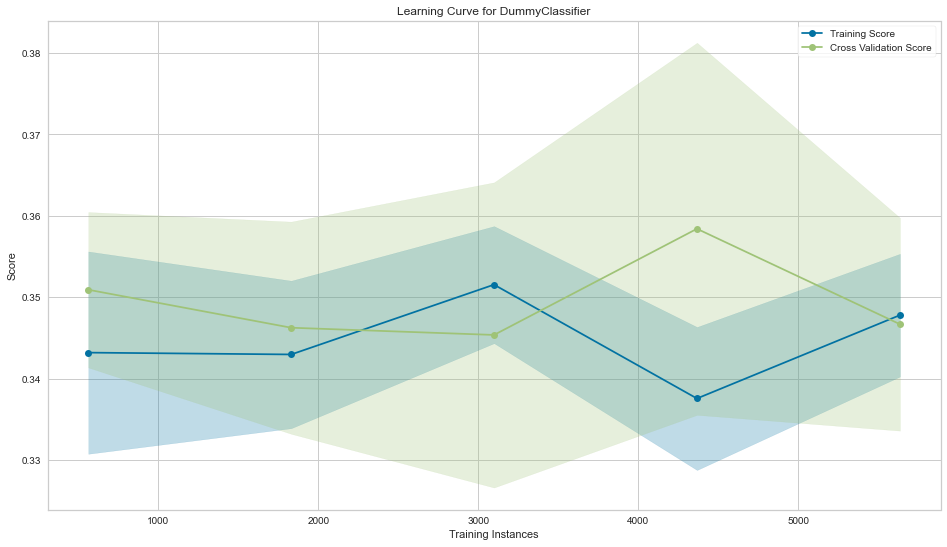

<AxesSubplot:title={'center':'Learning Curve for DummyClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from sklearn.dummy import DummyClassifier

plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 16})

viz = LearningCurve(DummyClassifier(strategy='uniform'), cv=5, scoring='f1', n_jobs=-1)
viz.fit(x_train, y_train)
viz.show()